# <center>IST-718 Final Project</center>
# <center>In-Game Assessment Scoring Engine</center>

### Prepared By 
#### Jagannathan Govindan <br> Jason Min-Liang Kang <br> Ram Krishnan <br> Steve DeVito 

## Introduction

#### PBS Kids is the brand for most of the children's programming aired by the Public Broadcasting Service (PBS) in the United States. PBS produces curriculum-based entertainment for children. PBS KIDS leverages the full spectrum of media and technology to build knowledge, critical thinking, imagination and curiosity. By involving parents, teachers, caregivers and communities as learning partners, PBS KIDS helps to empower children for success in school and in life.


## Data Munging

### About the Data

In [1]:
import pandas as pd
import numpy as np
import json as js
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import json
import glob
import os

### Get the training dataset for analysis and view the top 5 rows

In [27]:
filename='train.csv'

In [3]:
with open(filename,'r') as file_handler:
    file =file_handler.readlines()
    i=0
    for line in file:
        print(line)
        if i==5:
            break
        i+=1

event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world

27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE

27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK

77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK

b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":53,""event_code"":3010}",0001e90f,2,3010,53,Sand

### Read the complete trainging dataset as a dataframe

In [28]:
df_train = pd.read_csv(filename)

In [29]:
df_train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


### This training dataset is very large and has more than 11 million records

In [30]:
df_train.shape

(11341042, 11)

### Now read the training label 

In [40]:
train_label_file='train_labels.csv'
train_label=pd.read_csv(train_label_file)
train_label.shape

(17690, 7)

In [42]:
train_label[train_label.installation_id=='0006a69f']

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


### Training label has got only 17,690 records but we have more than 11 million training records . So lets check how many unique installations are available in both label data and the training data

In [33]:
installation_with_labels=train_label[['installation_id']].drop_duplicates()

In [34]:
installation_with_labels.shape

(3614, 1)

### Based on the below chart, the inferences are given below <br> 1. 0% accuracy belong to group 0 <br> 2. less than 50% accuracy belongs to group 1 <br> 3. 50% accuracy belongs to group 2 <br> 4. 100% accuracy belongs to group 3

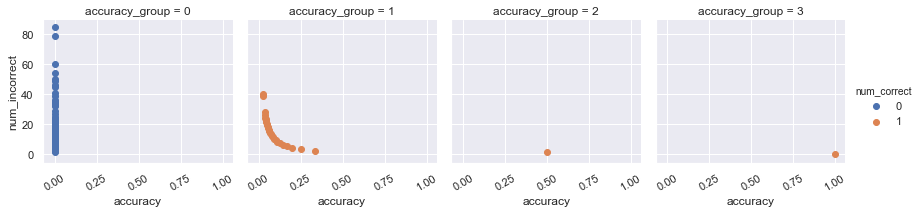

In [35]:
sns.set(style="darkgrid")
g = sns.FacetGrid(train_label[['num_correct','num_incorrect','accuracy','accuracy_group']].drop_duplicates(), col="accuracy_group", col_wrap=4,hue="num_correct")
g.map(plt.scatter, "accuracy", "num_incorrect", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

### Let us check the installation_id 0006a69f, The mean value of the accuracy is 0.7 which is above 0.5 and assuming that this installation_id can be mapped to accuracy_group 3 based on the above inferences

In [36]:
train_label[train_label.installation_id=='0006a69f'].describe()

,num_correct,num_incorrect,accuracy,accuracy_group
count,5.000000,5.000000,5.000000,5.00000
mean,0.800000,2.400000,0.700000,2.20000
std,0.447214,4.827007,0.447214,1.30384
min,0.000000,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.500000,2.00000
50%,1.000000,0.000000,1.000000,3.00000
75%,1.000000,1.000000,1.000000,3.00000
max,1.000000,11.000000,1.000000,3.00000


### we have 17,690 unique game_session in the training label which is same as the total number for training label we have got, the grain is at game_session level

In [37]:
len(set(train_label['game_session']))

17690

### There are only 3614 installations in label data. Let's use only the data which has labels to build a model, other records can be dropped for now

In [38]:
installation_with_asesment=df_train[df_train.type=='Assessment'][['installation_id']].drop_duplicates()

In [39]:
installation_with_asesment.shape

(4242, 1)

In [40]:
df_train_clean=pd.merge(left=df_train,right=installation_with_labels, left_on='installation_id', right_on='installation_id')

### Now, the training set is smaller and has got about 7 million record and the grain is not same as game session , so we need to aggregate acitivities to match the grain of training label.

In [14]:
df_train_clean.shape

(7734558, 11)

In [15]:
len(set(df_train_clean['game_session']))

175467

### Let us collect the event data from the dictionaries and extract the useful features for predicting the assesment accuracy

In [20]:
df_train_clean.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world'],
      dtype='object')

In [21]:
df_train_clean.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,34ba1a28d02ba8ba,2019-08-06T04:57:18.904Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,4b57c9a59474a1b9,2019-08-06T04:57:45.301Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,2b9d5af79bcdb79f,2019-08-06T04:58:14.538Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:58:14.615Z,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:16.680Z,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [2]:
df_train_clean['event_data'].to_pickle('event_data.pkl')

NameError: name 'df_train_clean' is not defined

In [3]:
df_event=pd.read_pickle('event_data.pkl')

In [3]:
df_event[10:20]

10    {"description":"Fill it up!","identifier":"Dot...
11    {"size":3,"sand":1,"duration":300,"coordinates...
12    {"coordinates":{"x":841,"y":406,"stage_width":...
13    {"description":"Fill it up!","identifier":"Dot...
14    {"size":0,"coordinates":{"x":782,"y":207,"stag...
15    {"size":3,"sand":2,"duration":526,"coordinates...
16    {"coordinates":{"x":842,"y":131,"stage_width":...
17    {"size":0,"coordinates":{"x":782,"y":207,"stag...
18    {"description":"Drag your mold to the sand to ...
19    {"size":3,"sand":3,"duration":558,"coordinates...
Name: event_data, dtype: object

In [6]:
path='C:\\Users\\rkrishnan\\Documents\\01 Personal\\MS\\IST 718\\Project\\data-science-bowl-2019\\event_data'

In [11]:
%%time
df_event_clean_batch1 = pd.io.json.json_normalize(df_event[0:2000000].apply(json.loads))

Wall time: 2min 26s


In [12]:
df_event_clean_batch1.to_pickle(path+'\\df_event_clean_batch1.pkl')

In [13]:
%%time
df_event_clean_batch2 = pd.io.json.json_normalize(df_event[2000000:4000000].apply(json.loads))
df_event_clean_batch2.index +=2000000

Wall time: 2min 37s


In [14]:
df_event_clean_batch2.to_pickle(path+'\\df_event_clean_batch2.pkl')

In [4]:
%%time
df_event_clean_batch3 = pd.io.json.json_normalize(df_event[4000000:].apply(json.loads))
df_event_clean_batch3.index +=4000000

Wall time: 5min 22s


In [7]:
df_event_clean_batch3.to_pickle(path+'\\df_event_clean_batch3.pkl')

In [8]:
df_event_clean = pd.DataFrame()
for file in glob.glob(os.path.join(path,'*.pkl')):
    temp = pd.read_pickle(file)
    df_event_clean = df_event_clean.append(temp,sort=False)

In [9]:
df_event_clean.reset_index(drop=True)
df_event_clean.shape

(7734558, 136)

In [24]:
# Another approach to extract the event data in a column format and seems to be not much efficient . This approach couldn't extract nested dict
event_lst=[js.loads(x) for x in df_train_clean['event_data']]
df_event_clean= pd.DataFrame(event_lst)
df_event_clean.head()

,event_code,event_count,version,game_time,description,identifier,media_type,total_duration,coordinates,duration,...,scale_weights,weights,nest,pillars,max_position,end_position,gate,dinosaur_weight,dinosaur_count,chests
0,2000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3010,2,NaN,29.0,"Let's build a sandcastle! First, fill up your ...","Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape",audio,6758.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4070,3,NaN,2137.0,NaN,NaN,NaN,NaN,"{'x': 273, 'y': 650, 'stage_width': 1015, 'sta...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
path='C:\\Users\\rkrishnan\\Documents\\01 Personal\\MS\\IST 718\\Project\\data-science-bowl-2019\\train'
df_train_clean[0:2000000].to_pickle(path+'\\df_train_clean_batch1.pkl')
df_train_clean[2000000:4000000].to_pickle(path+'\\df_train_clean_batch2.pkl')
df_train_clean[4000000:].to_pickle(path+'\\df_train_clean_batch3.pkl')

In [2]:
path='C:\\Users\\rkrishnan\\Documents\\01 Personal\\MS\\IST 718\\Project\\data-science-bowl-2019\\event_data'
df_event_clean_batch1=pd.read_pickle(path+'\\df_event_clean_batch1.pkl')
path='C:\\Users\\rkrishnan\\Documents\\01 Personal\\MS\\IST 718\\Project\\data-science-bowl-2019\\train'
df_train_clean_batch1=pd.read_pickle(path+'\\df_train_clean_batch1.pkl')

df_train_working_batch1 = pd.concat([df_train_clean_batch1, df_event_clean_batch1], axis=1, sort=False)
df_train_working_batch1=df_train_working_batch1.drop(['event_data'],axis=1)
df_train_working_batch1.to_pickle('df_train_working_batch1.pkl')

In [7]:
path='C:\\Users\\rkrishnan\\Documents\\01 Personal\\MS\\IST 718\\Project\\data-science-bowl-2019\\event_data'
df_event_clean_batch2=pd.read_pickle(path+'\\df_event_clean_batch2.pkl')
path='C:\\Users\\rkrishnan\\Documents\\01 Personal\\MS\\IST 718\\Project\\data-science-bowl-2019\\train'
df_train_clean_batch2=pd.read_pickle(path+'\\df_train_clean_batch2.pkl')

df_train_working_batch2 = pd.concat([df_train_clean_batch2, df_event_clean_batch2], axis=1, sort=False)
df_train_working_batch2=df_train_working_batch2.drop(['event_data'],axis=1)
df_train_working_batch2.to_pickle('df_train_working_batch2.pkl')

In [2]:
path='C:\\Users\\rkrishnan\\Documents\\01 Personal\\MS\\IST 718\\Project\\data-science-bowl-2019\\event_data'
df_event_clean_batch3=pd.read_pickle(path+'\\df_event_clean_batch3.pkl')
path='C:\\Users\\rkrishnan\\Documents\\01 Personal\\MS\\IST 718\\Project\\data-science-bowl-2019\\train'
df_train_clean_batch3=pd.read_pickle(path+'\\df_train_clean_batch3.pkl')

df_train_working_batch3 = pd.concat([df_train_clean_batch3, df_event_clean_batch3], axis=1, sort=False)
df_train_working_batch3=df_train_working_batch3.drop(['event_data'],axis=1)
df_train_working_batch3.to_pickle('df_train_working_batch3.pkl')

In [4]:
df_train_working_batch1=pd.read_pickle('df_train_working_batch1.pkl')
df_train_working_batch1.head()

,event_id,game_session,timestamp,installation_id,event_count,event_code,game_time,title,type,world,...,nest,pillars,max_position,end_position,gate.row,gate.column,gate.side,dinosaur_weight,dinosaur_count,chests
0,27253bdc,34ba1a28d02ba8ba,2019-08-06T04:57:18.904Z,0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27253bdc,4b57c9a59474a1b9,2019-08-06T04:57:45.301Z,0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77261ab5,2b9d5af79bcdb79f,2019-08-06T04:58:14.538Z,0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:58:14.615Z,0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:16.680Z,0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def desc_wide(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    result = pd.concat([total, percent], axis=1, keys=['total', 'percentage'])
    result['types'] = list(df.dtypes)
    return(np.transpose(result))

def desc_long(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    result = pd.concat([total, percent], axis=1, keys=['total', 'percentage'])
    result['types'] = list(df.dtypes)
    return result

In [47]:
df_long=desc_long(df_train_working_batch1[df_train_working_batch1.installation_id=='0006a69f'])
df_train_working_batch1_0006a69f=df_train_working_batch1[df_train_working_batch1.installation_id=='0006a69f'][list(df_long[df_long.percentage<100].index)]
df_train_working_batch1_0006a69f=pd.merge(left=df_train_working_batch1_0006a69f,right=train_label[train_label.installation_id=='0006a69f'], left_on='game_session', right_on='game_session')
df_train_working_batch1_0006a69f.to_csv('df_train_working_batch1_0006a69f.csv')

In [51]:
df_train_final_batch1=pd.merge(left=df_train_working_batch1,right=train_label, left_on='game_session', right_on='game_session')

In [53]:
df_train_final_batch1.to_pickle('df_train_final_batch1.pkl')

In [55]:
df_train_working_batch2=pd.read_pickle('df_train_working_batch2.pkl')
df_train_final_batch2=pd.merge(left=df_train_working_batch2,right=train_label, left_on='game_session', right_on='game_session')

In [56]:
df_train_final_batch2.to_pickle('df_train_final_batch2.pkl')

In [ ]:
df_train_final_batch2= pd.read_pickle('df_train_final_batch2.pkl')

In [ ]:
df_train_working_batch3= pd.read_pickle(directory+'df_train_working_batch3.pkl')
df_train_working_batch3=df_train_final_batch3[df_train_working_batch3.event_id.notnull()]
df_train_working_batch3.to_pickle('df_train_working_batch3_v2.pkl')

In [ ]:
df_train_working_batch3=pd.read_pickle('df_train_working_batch3_v2.pkl')
df_train_final_batch3=pd.merge(left=df_train_working_batch3,right=train_label, left_on='game_session', right_on='game_session')

In [ ]:
df_train_final_batch3.to_pickle('df_train_final_batch3.pkl')

In [ ]:
df_train_final_batch3= pd.read_pickle('df_train_final_batch3.pkl')